# Projeto: Análise Exploratória dos Dados de Gorjeta

## Sobre o Projeto:
    
Este projeto é resultado do treinamento <b> Data Visualization: Explorando com Seaborn</b> da Alura, em que foi utilizado os dados disponíbeis pela biblioteca Seaborn e previamente tratadas.

## Informações Importantes:
<sub><i> *Dados Fictícios </i><sub><br>
   
## Objetivo: 

Analisar uma <b>amostra</b> dos dados e responder as seguintes questões:
    
1. O Valor da conta influência no valor da gorjeta?
2. Há diferença no valor da gorjeta entre quem pede e quem não pede sobremesa?
3. O dia da semena influencia no valor da gorjeta?
4. Qual hora do dia as gorjetas são maiores? E menores?

#### Bibliotecas utilizadas

In [1]:
import pandas as pd
!pip show pandas

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\natalia\anaconda3\lib\site-packages
Requires: numpy, pytz, python-dateutil
Required-by: statsmodels, seaborn


In [2]:
import seaborn as sns
sns.set_theme(style="ticks", palette="husl")#registrando tema
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\natalia\anaconda3\lib\site-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: 


In [3]:
# inline mostrara um gráfico estática na tela
%matplotlib inline
import matplotlib.pyplot as plt
!pip show matplotlib

Name: matplotlib
Version: 3.3.4
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\natalia\anaconda3\lib\site-packages
Requires: kiwisolver, pyparsing, numpy, cycler, pillow, python-dateutil
Required-by: seaborn, scikit-image


In [4]:
from scipy.stats import ranksums

#### Importando base de dados

In [5]:
# lendo o dataset 
dados = pd.read_csv('dados/tips.csv', sep=',')

In [6]:
# Visualizando o tamanho do dataset
print('A base de dados contém {} linhas e {} colunas'.format(dados.shape[0],dados.shape[1]))

A base de dados contém 244 linhas e 6 colunas


In [7]:
# Visualizando resumo das informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [8]:
# Visualizando uma amostra dos dados
dados.sample(5)

,total_bill,tip,dessert,day,time,size
233,10.77,1.47,No,Sat,Dinner,2
72,26.86,3.14,Yes,Sat,Dinner,2
26,13.37,2.00,No,Sat,Dinner,2
17,16.29,3.71,No,Sun,Dinner,3
83,32.68,5.00,Yes,Thur,Lunch,2


#### Traduzindo dados -  etapa apenas para fins didáticos!

In [9]:
# Verificando o nome das colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [10]:
# Renomeando as colunas

#criando um dicionário onde a chave é o objeto atual e o valor é o objeto que devera substituir o atual
renomear = {
    'total_bill':'total_conta', 
    'tip':'gorjeta', 
    'dessert':'sobremesa', 
    'day':'dia_da_semana', 
    'time':'hora_do_dia', 
    'size':'total_de_pessoas'    
}

#criando novo dataframe 
gorjetas = dados.rename(columns=renomear)
gorjetas.head(5)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [11]:
# Renomeando campo sobremesa

#visualizando os dados da variável com o método unique()
gorjetas.sobremesa.unique()

#criando dicionário
sim_não = {
    'No':'Não', 
    'Yes':'Sim'
}

#trocando os valores da coluna usando a função map()
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_não)
gorjetas.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [12]:
# Renomeando campo dia da semana

#visualizando os dados da variável com o método unique()
gorjetas.dia_da_semana.unique()

#criando dicionário
semana = {
    'Sun':'Dom', 
    'Sat':'Sáb', 
    'Thur':'Qui', 
    'Fri':'Sex'
}

#trocando os valores da coluna usando a função map()
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(semana)
gorjetas.dia_da_semana.unique()

array(['Dom', 'Sáb', 'Qui', 'Sex'], dtype=object)

In [13]:
# Renomeando campo hora do dia

#visualizando os dados da variável com o método unique()
gorjetas.hora_do_dia.unique()

#criando dicionário
hora = {
   'Dinner':'Jantar', 
    'Lunch':'Almoço'
}

#trocando os valores da coluna usando a função map()
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

### Primeira Análise: <b>O Valor da conta influência no valor da gorjeta?</b>

#### Visualizando os dados através de um gráfico de dispersão

Text(0, 0.5, 'Valor da Gorjeta $')

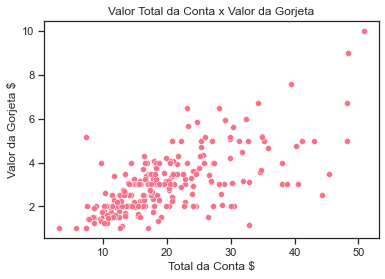

In [14]:
# Gráfico 01: Valor Total da Conta x Valor da Gorjeta
fig1 = sns.scatterplot(x='total_conta', y='gorjeta', data=gorjetas)
fig1.set_title('Valor Total da Conta x Valor da Gorjeta')
fig1.set_xlabel(xlabel='Total da Conta $')
fig1.set_ylabel(ylabel='Valor da Gorjeta $')

<b>Visualmente</b> o valor da gorjeta aumenta conforme o valor da conta

#### Analisando se o crescimento é proporcional

In [15]:
# Criando uma nova coluna com o percentual da gorjeta em relação ao valor da conta
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['total_conta']).round(3)

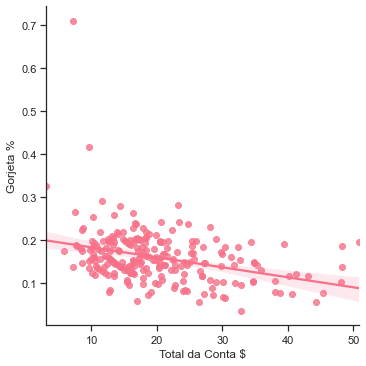

In [16]:
# Gráfico 02: Valor Total da Conta x Porcentagem da Gorjeta
fig2 = sns.lmplot(x='total_conta', y='porcentagem', data=gorjetas)
fig2.set_titles('Valor Total da Conta x Porcentagem da Gorjeta')
fig2.set_xlabels(label='Total da Conta $')
fig2.set_ylabels(label='Gorjeta %')

<b>Visualmente</b> se pode notar que a porcentagem da gorjetar não cresce proporcionalmente conforme o valor da conta aumenta.

In [17]:
gorjetas.head(1)

,total_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059


### Segunda Análise:<b> Há diferença no valor da gorjeta entre quem pede e quem não pede sobremesa?</b>


#### Estatísticas descritivas

In [18]:
# Filtrando quem pediu sobremesa
gorjetas[gorjetas['sobremesa']=='Sim'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085093
min,3.070000,1.000000,1.000000,0.036000
25%,13.420000,2.000000,2.000000,0.107000
50%,17.920000,3.000000,2.000000,0.154000
75%,26.860000,3.680000,3.000000,0.195000
max,50.810000,10.000000,5.000000,0.710000


In [19]:
# Filtrando quem não pediu sobremesa
gorjetas[gorjetas['sobremesa']=='Não'].describe()

,total_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159331
std,8.255582,1.377190,1.017984,0.039949
min,7.250000,1.000000,1.000000,0.057000
25%,13.325000,2.000000,2.000000,0.136500
50%,17.590000,2.740000,2.000000,0.156000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.292000


#### Analisando a distribuição das gorjetas de quem pediu ou não sobremesa através de gráficos

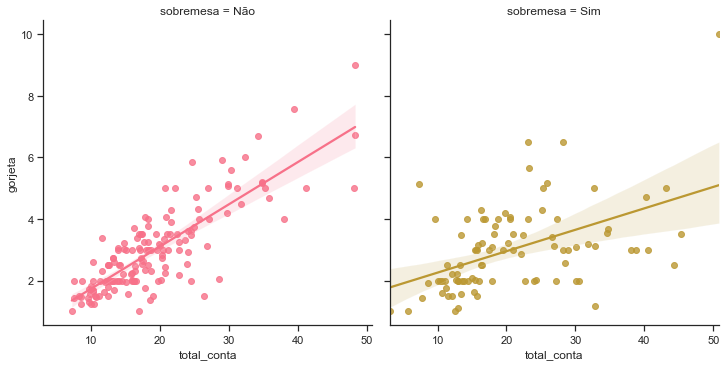

In [20]:
# Gráfico 03: Gorjeta x Sobremesa
fig3 = sns.lmplot(x='total_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

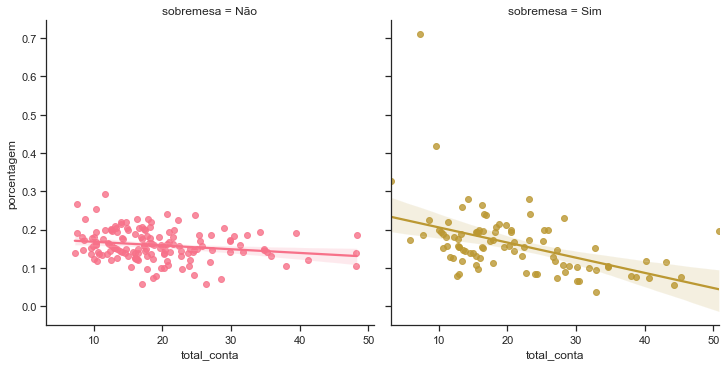

In [21]:
# Gráfico 04: Porcentagem x Sobremesa
fig3 = sns.lmplot(x='total_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

<b>Visualmente</b> existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e dos que não pediram.

#### Teste de Hipótese
##### <b>H<sup>null</sup></b> A distribuição da taxa da gorjeta é a mesma nos dois grupos
##### <b>H<sup>alt</sup></b> A distribuição da taxa da gorjeta NÃO é a mesma nos dois grupos

In [22]:
# Calculando a porcentagem de todos que pediram sobremesa
sobremesa_sim =gorjetas.query("sobremesa == 'Sim'").porcentagem

In [23]:
# Calculando a porcentagem de todos que não pediram sobremesa
sobremesa_nao =gorjetas.query("sobremesa == 'Não'").porcentagem

In [24]:
# Calculando o PVALUE
r = ranksums(sobremesa_sim, sobremesa_nao)
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.5676760764441404


Com o valor do pvalue maior que 0,05, descartamos a hipótese alternativa e ficamos com a <b> hipótese nula - A distribuição da taxa da gorjeta é a mesma nos dois grupos

### Terceira Análise: <b>O dia da semena influencia no valor da gorjeta?

#### Análise categórica

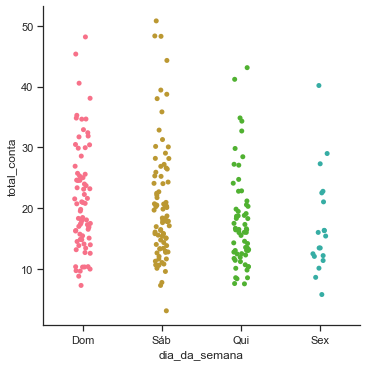

In [25]:
# Gráfico 04: Distribuição do valor total da conta em relação ao dia da semana
fig4 =  sns.catplot(x=gorjetas.dia_da_semana,y=gorjetas.total_conta, hue=gorjetas.dia_da_semana, data=gorjetas)

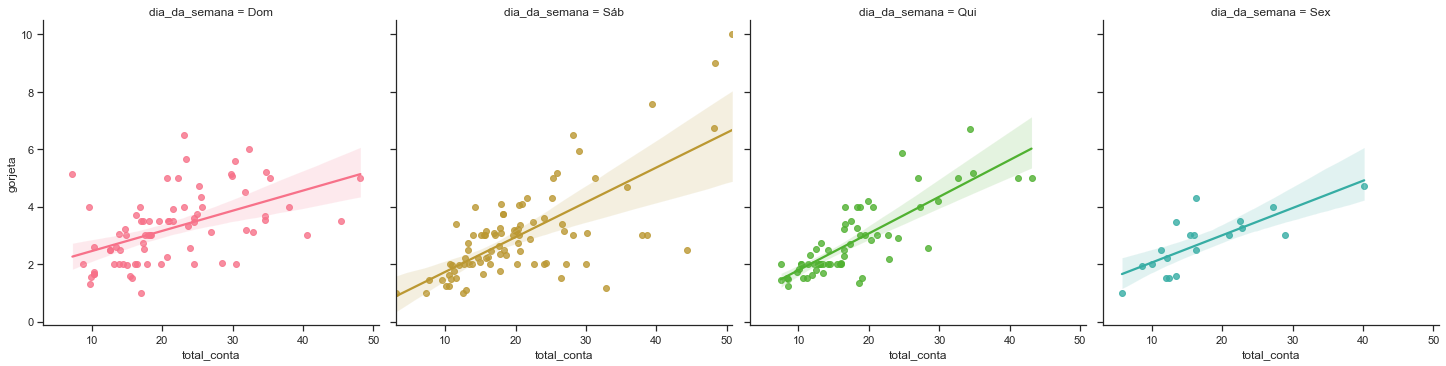

In [26]:
# Gráfico 05: Distribuição da gorjeta em relação ao dia da semana
fig5 = sns.lmplot(x='total_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

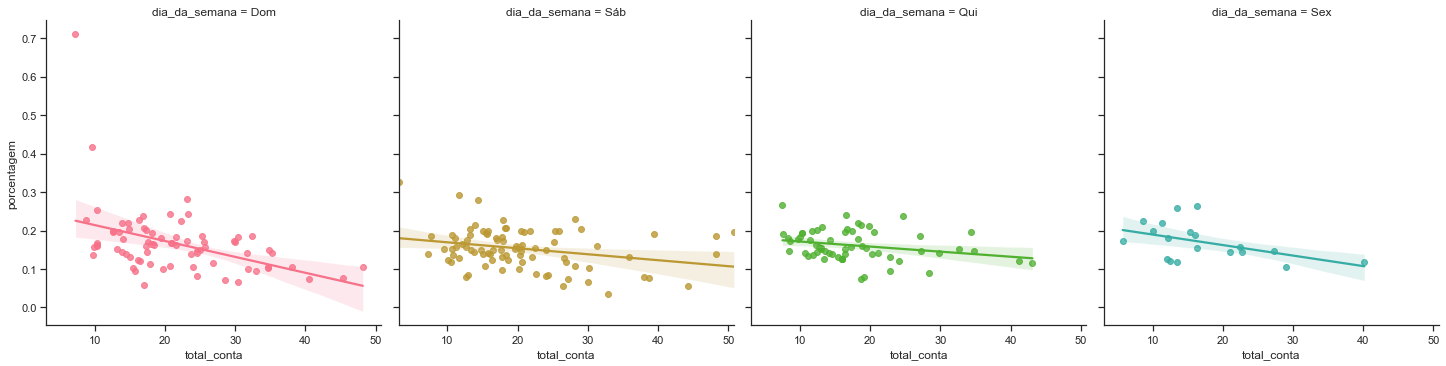

In [27]:
# Gráfico 06: Distribuição da porcentagem em relação ao dia da semana
fig6 = sns.lmplot(x='total_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

#### Análise Descritiva

In [28]:
# Média geral das gorjetas
media_geral = gorjetas['gorjeta'].mean()
print('A média geral das gorjetas é: {}'.format(media_geral))

A média geral das gorjetas é: 2.9982786885245902


In [29]:
# Média geral das gorjetas por dia da semana
media_geral_semana = gorjetas.groupby(['dia_da_semana']).mean()[['total_conta', 'gorjeta', 'porcentagem']]
media_geral_semana

,total_conta,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.410000,3.255132,0.166921
Qui,17.682742,2.771452,0.161274
Sex,17.151579,2.734737,0.170000
Sáb,20.441379,2.993103,0.153149


In [30]:
# Frequência de atendimentos por dia
print("Frequência dos dias")
frequencia_semana = gorjetas.dia_da_semana.value_counts()
frequencia_semana

Frequência dos dias


Sáb    87
Dom    76
Qui    62
Sex    19
Name: dia_da_semana, dtype: int64

#### Teste de Hipótese
##### <b>H<sup>null</sup></b> A distribuição do valor da conta é igual no sábado e no domingo
##### <b>H<sup>alt</sup></b> A distribuição do valor da conta não é igual no sábado e no domingo

In [31]:
# Calculando o valor da conta dos pedidos realizados no sábado
sabado = gorjetas.query("dia_da_semana == 'Sáb'").total_conta

In [32]:
# Calculando o valor da conta dos pedidos realizados no domingo
domingo = gorjetas.query("dia_da_semana == 'Dom'").total_conta

In [33]:
# Calculando o PVALUE
r = ranksums(sabado, domingo)
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.3576728477868443


Com o valor do pvalue maior que 0,05, descartamos a hipótese alternativa e ficamos com a <b> hipótese nula - A distribuição do valor da conta é igual no sábado e no domingo

### Quarta Análise: <b> Há diferença do valor da conta e da gorjeta dependendo do horário?

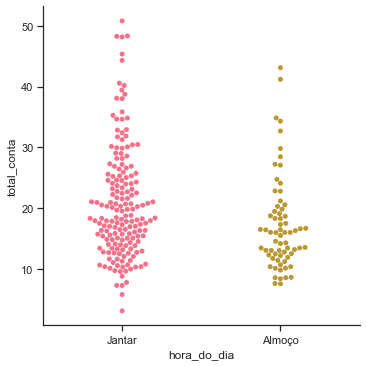

In [34]:
# Gráfico 07A: Distribuição do valor da conta pela hora do dia
fig7a = sns.catplot(x=gorjetas.hora_do_dia, y=gorjetas.total_conta, kind='swarm', data=gorjetas)

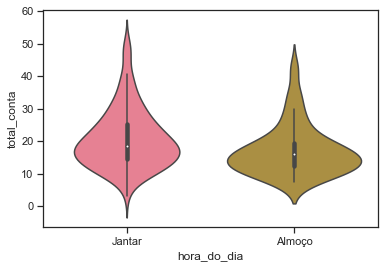

In [35]:
# Gráfico 07B: Distribuição do valor da conta pela hora do dia
fig7b = sns.violinplot(x=gorjetas.hora_do_dia, y=gorjetas.total_conta, data=gorjetas)

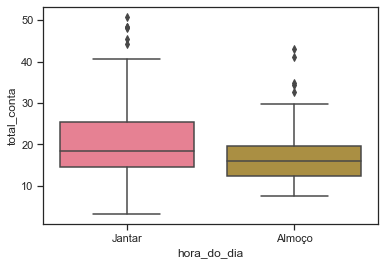

In [36]:
# Gráfico 08: Distribuição do valor da com pela hora do dia visualizando as média
fig8 = sns.boxplot(x=gorjetas.hora_do_dia, y=gorjetas.total_conta, data=gorjetas)

#### Frequência

In [37]:
# Selecionando somento o total da conta dos registros do almoço
almoco = gorjetas.query("hora_do_dia == 'Almoço'").total_conta

In [38]:
# Selecionando somento o total da conta dos registros do jantar
jantar = gorjetas.query("hora_do_dia == 'Jantar'").total_conta

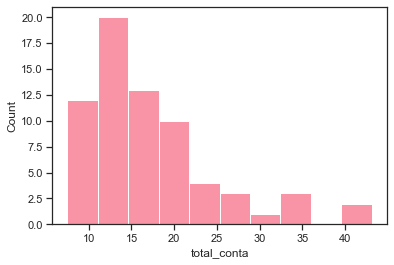

In [39]:
# Gráfico 09: Histograma Almoço
fig9 = sns.histplot(almoco)

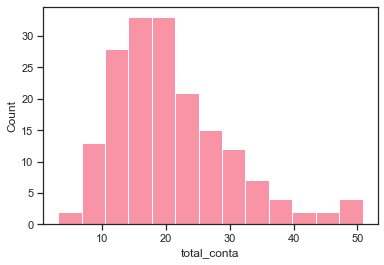

In [40]:
# Gráfico 10: Histograma Jantar
fig10 = sns.histplot(jantar)

#### Teste de Hipótese
##### <b>H<sup>null</sup></b> A distribuição do valor da conta é igual no jantar e no almoço
##### <b>H<sup>alt</sup></b> A distribuição do valor da conta não é igual no jantar e no almoço

##### Teste aplicado ao Valor Total da Conta

In [41]:
# Visualizando a média pela hora do dia
gorjetas.groupby(['hora_do_dia']).mean()[['total_conta', 'gorjeta', 'porcentagem']]

,total_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.164132
Jantar,20.797159,3.102670,0.159534


In [42]:
# Calculando o PVALUE
r = ranksums(jantar, almoco)
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.0011791039723641672


Para o teste de hipótese aplicado no Valor Total da Conta, obtivemos um valor de pvalue inferior a 0,05.Portanto, rejeitamos a hipótese nula, pois são dois dois grupos distintos e aceitamos <b>H<sup>alt</sup> A distribuição do valor da conta não é igual no jantar e no almoço

#### Teste de Hipótese
##### <b>H<sup>null</sup></b> A distribuição da porcentagem das gorjetas é igual no jantar e no almoço
##### <b>H<sup>alt</sup></b> A distribuição da porcentagem das gorjetas não é igual no jantar e no almoço

##### Teste aplicado a Gorjeta

In [43]:
# Selecionando a porcentagem das gorjetas do almoço
almoco_gjt = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [44]:
# Selecionando a porcentagem das gorjetas do almoço
jantar_gjt = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [45]:
# Calculando o PVALUE
r = ranksums(jantar_gjt, almoco_gjt)
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.23027859883366675


Para o teste de hipótese aplicado no porcentagem das Gorjetas, obtivemos um valor de pvalue superior a 0,05. Portanto, rejeitamos a hipótese alternativa e mantemos a <b>H<sup>null</sup> A distribuição da porcentagem das gorjetas é igual no jantar e no almoço